In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

In [2]:
Hospital_merged_pd = pd.read_csv("Hospital_Merged_CleanNoIndex.csv")

In [3]:
Hospital_merged_pd.head(5)

,Provider ID,Cleanliness,Nurse_com,Doc_com,Staff_responsiveness,Pain_management,Comm_medicine,Discharge_info,Care_transition,Overall_Hos_Rating,...,Summary_star,Hospital Name,Address,City,State,County Name,ZIP Code,Phone Number,Hospital Type,Hospital Ownership
0,50002,2,2,2,2,2,2,2,1,2,...,2,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,ALAMEDA,94545,5107826200,Acute Care Hospitals,Voluntary non-profit - Church
1,50006,2,2,2,2,3,2,3,2,2,...,2,ST JOSEPH HOSPITAL,2700 DOLBEER ST,EUREKA,CA,HUMBOLDT,95501,7074458121,Acute Care Hospitals,Voluntary non-profit - Private
2,50007,3,4,3,3,4,3,3,4,5,...,4,MILLS-PENINSULA MEDICAL CENTER,1501 TROUSDALE DRIVE,BURLINGAME,CA,SAN MATEO,94010,6506965270,Acute Care Hospitals,Voluntary non-profit - Private
3,50008,2,2,3,2,3,2,2,2,3,...,2,CALIFORNIA PACIFIC MEDICAL CTR-DAVIES CAMPUS HOSP,601 DUBOCE AVE,SAN FRANCISCO,CA,SAN FRANCISCO,94117,4156006000,Acute Care Hospitals,Voluntary non-profit - Other
4,50009,2,3,3,3,3,3,3,2,3,...,3,QUEEN OF THE VALLEY MEDICAL CENTER,1000 TRANCAS ST,NAPA,CA,NAPA,94558,7072524411,Acute Care Hospitals,Voluntary non-profit - Church


In [4]:
# Replaced the "Not Available rating with an integer of -1, so we can look at plotting the not available data as well.
#Hospital_merged_pd["Overall_Hos_Rating"] = Hospital_merged_pd["Overall_Hos_Rating"].replace("Not Available", 0)
Hospital_merged_pd = Hospital_merged_pd[Hospital_merged_pd.Overall_Hos_Rating != "Not Available"]

In [5]:
Hospital_merged_pd["Overall_Hos_Rating"]

0      2
1      2
2      5
3      3
4      3
5      3
6      3
7      4
8      2
9      2
10     2
11     4
12     4
13     3
14     1
15     3
16     2
17     5
18     4
19     3
20     3
21     2
22     3
23     2
24     2
25     1
26     3
27     3
28     3
29     1
      ..
277    4
278    3
280    3
281    4
282    5
283    4
284    5
285    4
286    1
287    4
288    3
289    4
290    2
291    4
292    4
293    4
294    1
300    5
307    5
312    3
313    2
315    3
316    4
317    2
319    4
320    2
323    5
324    3
327    3
329    4
Name: Overall_Hos_Rating, Length: 294, dtype: object

In [6]:
Hospital_merged_pd["Overall_Hos_Rating"] = Hospital_merged_pd["Overall_Hos_Rating"].astype("float")

In [12]:
Hospital_merged_pd.boxplot(column = "Overall_Hos_Rating", by = "County Name", figsize = (20,10), rot = 90, grid=False)

/Users/janakidevikora/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


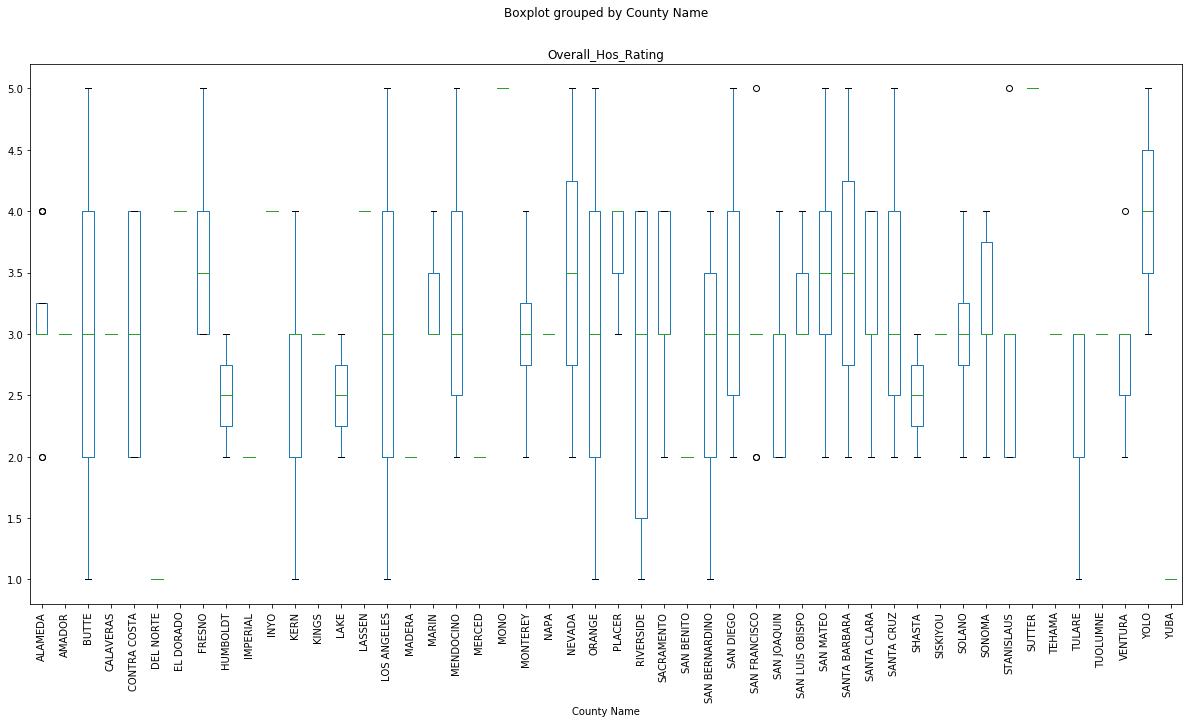

In [13]:
plt.show()

In [8]:
County_ratings = Hospital_merged_pd.groupby("County Name")

In [14]:
county_income = pd.read_csv("county_income_df.csv")
county_income.columns
Hospital_merged_pd['County'] = Hospital_merged_pd['County Name']

In [24]:
county_income['County'] = county_income['County'].str.upper()

In [36]:
Final_merge_pd = pd.merge(Hospital_merged_pd,county_income,on='County',how='left')

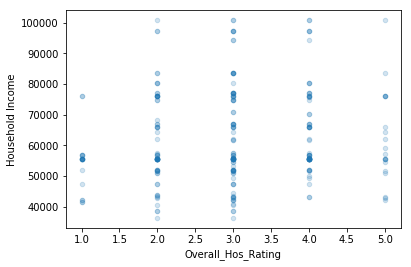

In [37]:
pd.merge(Hospital_merged_pd,county_income,on='County',how='left').plot.scatter('Overall_Hos_Rating','Household Income',alpha=.2)
plt.show()

In [9]:
County_ratings["City"].count()

County Name
ALAMEDA            12
AMADOR              1
BUTTE               3
CALAVERAS           1
CONTRA COSTA        7
DEL NORTE           1
EL DORADO           2
FRESNO              6
HUMBOLDT            2
IMPERIAL            2
INYO                1
KERN                7
KINGS               1
LAKE                2
LASSEN              1
LOS ANGELES        72
MADERA              1
MARIN               3
MENDOCINO           3
MERCED              2
MONO                1
MONTEREY            4
NAPA                2
NEVADA              2
ORANGE             22
PLACER              3
RIVERSIDE          15
SACRAMENTO          8
SAN BENITO          1
SAN BERNARDINO     15
SAN DIEGO          15
SAN FRANCISCO       9
SAN JOAQUIN         7
SAN LUIS OBISPO     3
SAN MATEO           6
SANTA BARBARA       4
SANTA CLARA         9
SANTA CRUZ          3
SHASTA              2
SISKIYOU            2
SOLANO              4
SONOMA              6
STANISLAUS          5
SUTTER              1
TEHAMA              

In [10]:
meanRatings_County = pd.DataFrame(round(County_ratings["Overall_Hos_Rating"].mean(), 2))
#DataFrame({'count' : df1.groupby( [ "Name", "City"] ).size()}).reset_index()
#meanRatings_County.set_index()
meanRatings_County.to_csv("Mean_Overall_Ratings_perCounty.csv")
meanRatings_County

,Overall_Hos_Rating
County Name,
ALAMEDA,3.08
AMADOR,3.00
BUTTE,3.00
CALAVERAS,3.00
CONTRA COSTA,3.00
DEL NORTE,1.00
EL DORADO,4.00
FRESNO,3.67
HUMBOLDT,2.50


In [11]:
mean_ratings_county = pd.read_csv("Mean_Overall_Ratings_perCounty.csv")
mean_ratings_county

,County Name,Overall_Hos_Rating
0,ALAMEDA,3.08
1,AMADOR,3.00
2,BUTTE,3.00
3,CALAVERAS,3.00
4,CONTRA COSTA,3.00
5,DEL NORTE,1.00
6,EL DORADO,4.00
7,FRESNO,3.67
8,HUMBOLDT,2.50
9,IMPERIAL,2.00
